## Web Scraping with Python - IMDB Top 250 Movies

> "pip install beautifulsoup4"

> "pip list" to check if beautifulsoup4 is installed.

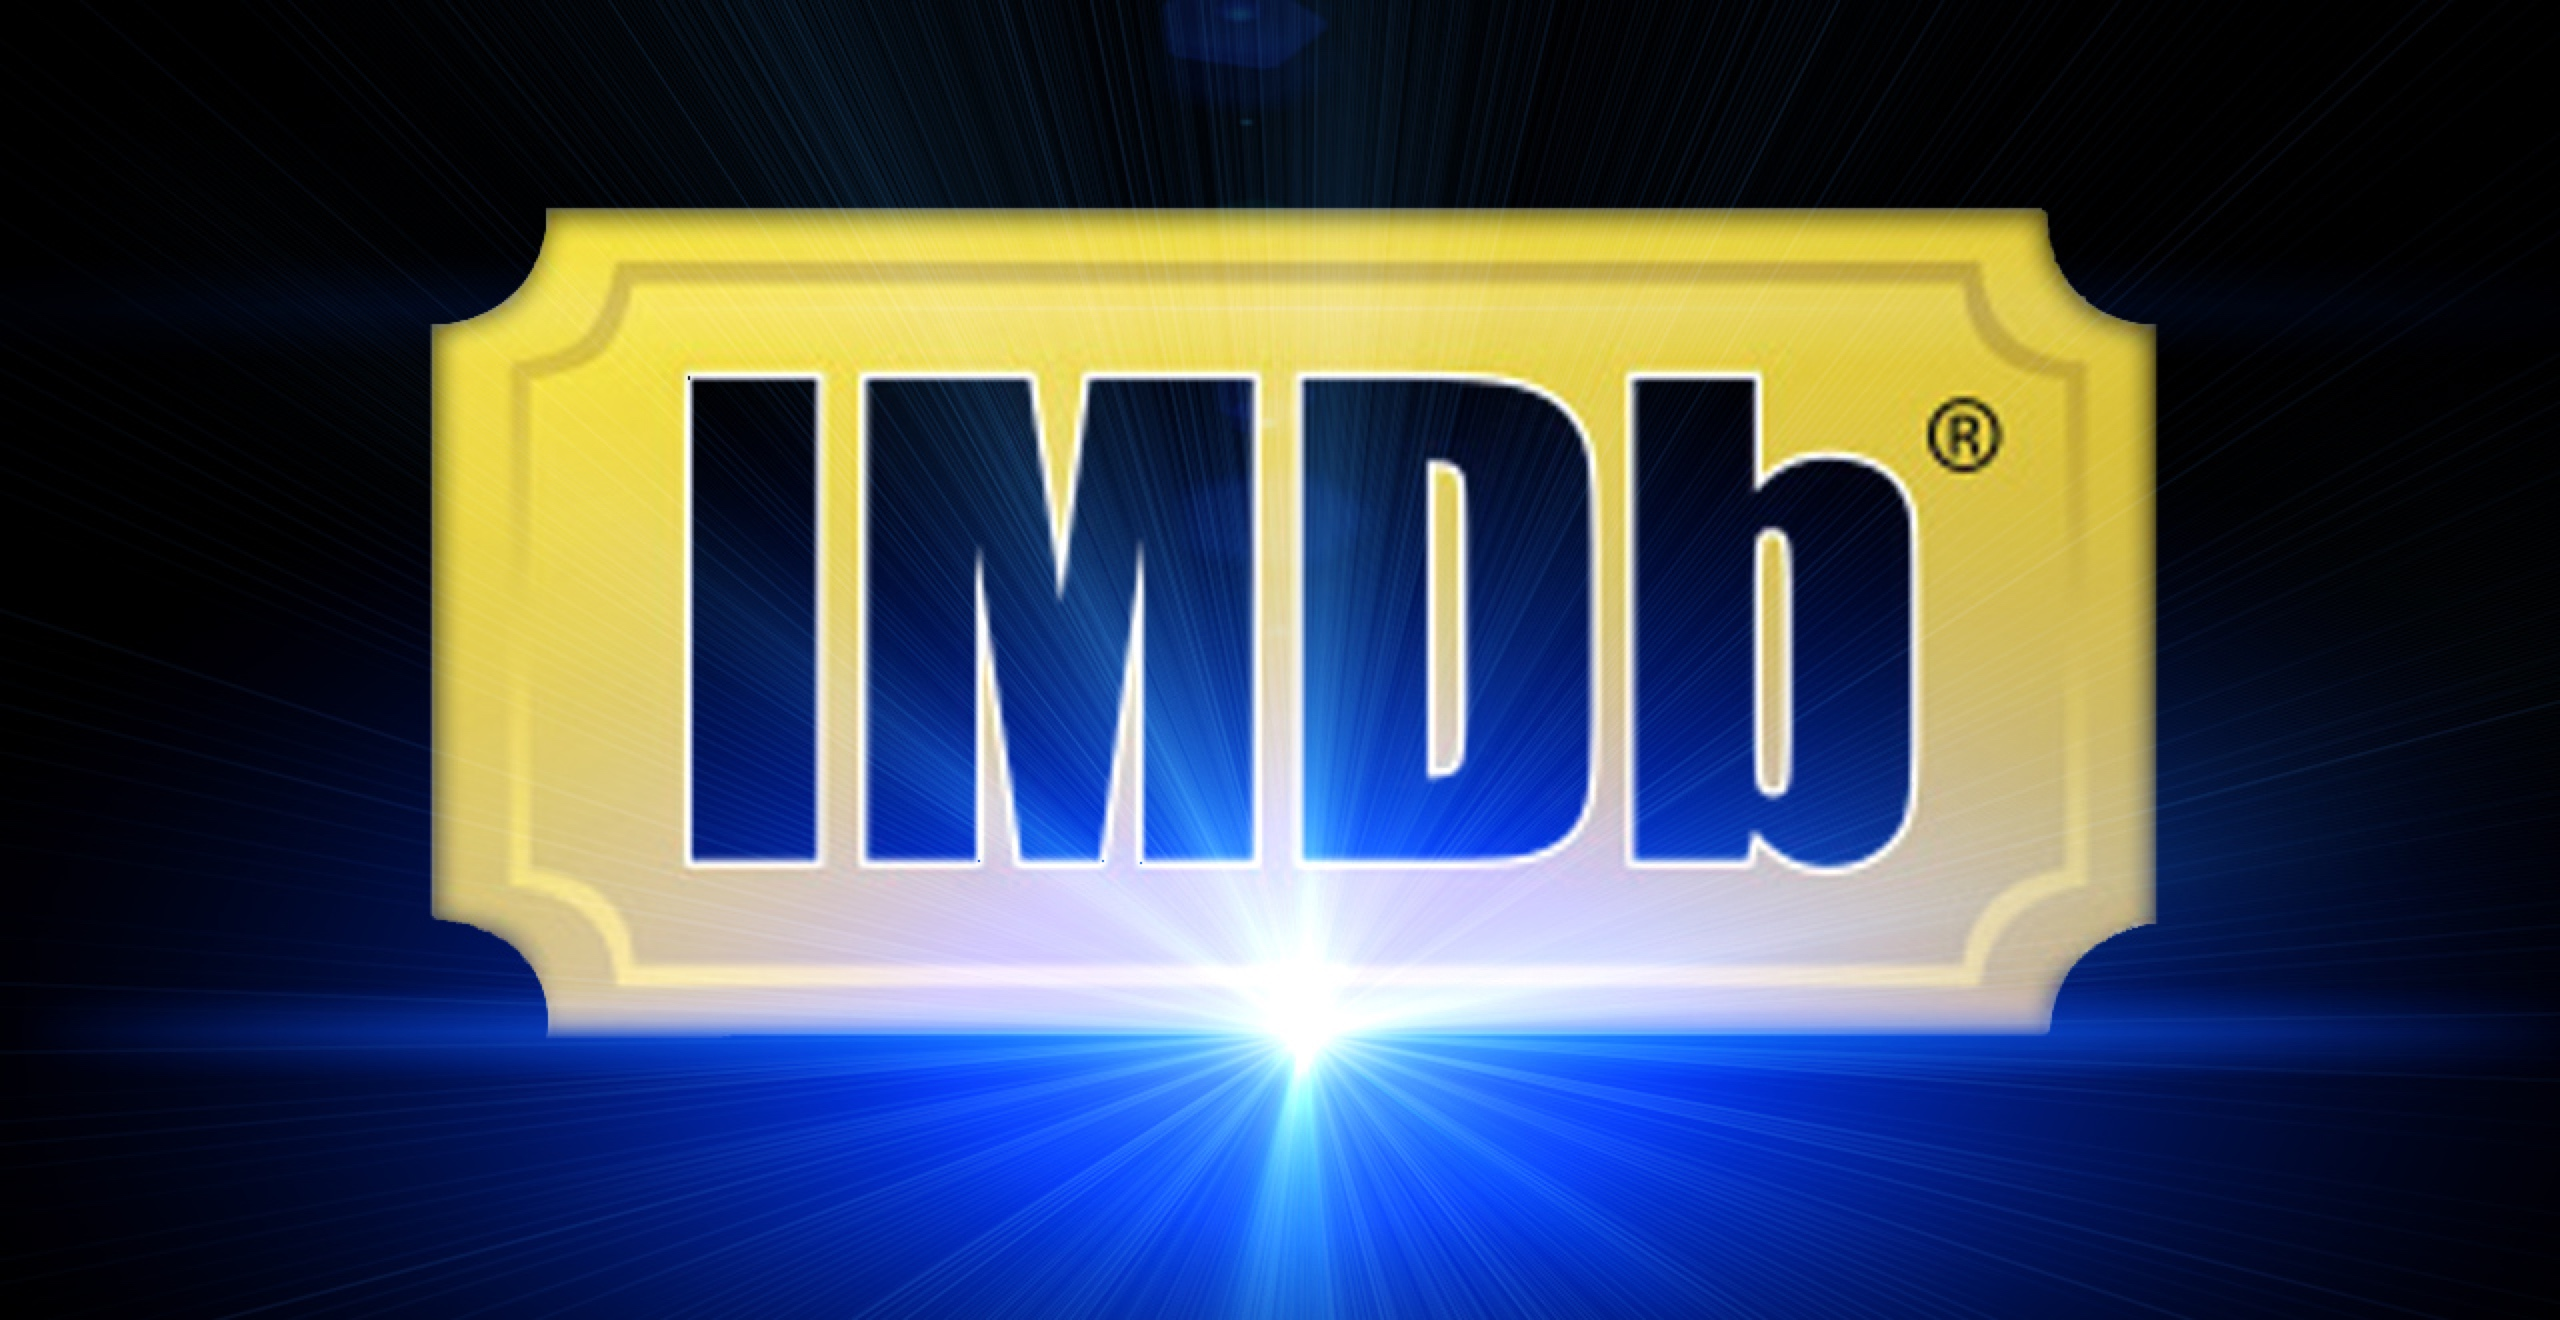

In [1]:
from IPython.display import display, Image

path1 = "imdb.jpg"
img1 = Image(path1)
display(img1)

### Beautiful Soup Documentation - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Note: Step 7 to 12 and Step 14 to 17 are just for explanation purpose on how to extract data and not needed for scraping the entire data.

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing python libraries for web scraping and data preparation
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# We will work with this url - Imdb Top 250 movies
url="https://www.imdb.com/chart/top/?ref_=nv_mv_250"

# Generating raw HTML content from the url
html_content = requests.get(url).text

In [4]:
# Parse HTML content using BeautifulSoup - "pip install lxml" if you do not have it 
soup = BeautifulSoup(html_content, "lxml")

# Print parsed HTML data
# print(soup.prettify())

In [5]:
# Title in text of HTML doc
print(soup.title.text)

IMDb Top 250 - IMDb


In [6]:
# soup.find_all() will find all those elements which have head tag name as 'td' and head tag attribute 'class' is 'titleColumn'. 
movie_result = soup.find_all('td',attrs={'class':'titleColumn'})

# Output would return a BeautifulSoup ResultSet with all those elements.
movie_result

[<td class="titleColumn">
       1.
       <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
 <span class="secondaryInfo">(1994)</span>
 </td>, <td class="titleColumn">
       2.
       <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>
 <span class="secondaryInfo">(1972)</span>
 </td>, <td class="titleColumn">
       3.
       <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">The Godfather: Part II</a>
 <span class="secondaryInfo">(1974)</span>
 </td>, <td class="titleColumn">
       4.
       <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">The Dark Knight</a>
 <span class="secondaryInfo">(2008)</span>
 </td>, <td class="titleColumn">
       5.
       <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">12 Angry Men</a>
 <span class="secondaryInfo">(195

In [7]:
# In the above result set, the first element is the first movie's element : The Shawshank Redemption Element
first_movie_element = movie_result[0]
first_movie_element

<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>

### Note: In this element, the head tag whose tag name is 'td' has children tags and children strings inside it. We need to deal with them to extract data within it.

### We want to extract 'movie_rank', 'movie_name', 'movie_year' and 'movie_director'.

In [8]:
# List of Head Tag Children - First Movie Element
a = []
for child in first_movie_element.children:
    a.append(child)
a

['\n      1.\n      ',
 <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>,
 '\n',
 <span class="secondaryInfo">(1994)</span>,
 '\n']

In [9]:
# Extracting rank for first movie
first_movie_rank = int(a[0].strip().replace('.',''))
first_movie_rank

1

In [10]:
# Extracting title for first movie
first_movie_title = a[1].text
first_movie_title

'The Shawshank Redemption'

In [11]:
# Extracting year for first movie
first_movie_year = int(a[3].text[1:5])
first_movie_year

1994

In [12]:
# Extracting director for first movie
first_movie_director_actor = a[1]['title']
print(first_movie_director_actor)

first_movie_director = first_movie_director_actor.split(' (dir.)')[0]
first_movie_director

Frank Darabont (dir.), Tim Robbins, Morgan Freeman


'Frank Darabont'

In [13]:
# soup.find_all() will here find all those elements which have head tag name as 'td' and head tag attribute 'class' is 'ratingColumn imdbRating'. 
rating_result = soup.find_all('td',attrs={'class':'ratingColumn imdbRating'})

rating_result

[<td class="ratingColumn imdbRating">
 <strong title="9.2 based on 2,306,534 user ratings">9.2</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="9.1 based on 1,591,827 user ratings">9.1</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="9.0 based on 1,112,127 user ratings">9.0</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="9.0 based on 2,269,644 user ratings">9.0</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="8.9 based on 678,006 user ratings">8.9</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="8.9 based on 1,196,637 user ratings">8.9</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="8.9 based on 1,620,183 user ratings">8.9</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="8.8 based on 1,800,197 user ratings">8.8</strong>
 </td>, <td class="ratingColumn imdbRating">
 <strong title="8.8 based on 679,577 user ratings">8.8</strong>
 </td>, <td 

In [14]:
# In the above result set, the first element is the first rating element : rating for The Shawshank Redemption
first_rating_element = rating_result[0]
first_rating_element

<td class="ratingColumn imdbRating">
<strong title="9.2 based on 2,306,534 user ratings">9.2</strong>
</td>

In [15]:
b = []
for child in first_rating_element.children:
    b.append(child)
b

['\n', <strong title="9.2 based on 2,306,534 user ratings">9.2</strong>, '\n']

In [16]:
# Extracting rating for first movie
first_movie_rating = float(b[1].text)
first_movie_rating

9.2

In [17]:
# Extracting no_users for first movie
first_movie_users = int(b[1]['title'].split()[3].replace(',',''))
first_movie_users

2306534

### Writing a script to scrape data for all movies on the url.

In [18]:
# Empty list which we will be loading with data in the script below
rank = []
movies = []
year =[]
director = []
user_rating = []
users = []

In [19]:
# Script to load movie rank, movie name, movie year and movie director into their respective lists
for movie_element in movie_result:
    children = []
    for child in movie_element.children:
        children.append(child)
    rank.append(int(children[0].strip().replace('.','')))
    movies.append(children[1].text)
    year.append(int(children[3].text[1:5]))
    director.append(children[1]['title'].split(' (dir.)')[0])

In [20]:
# Script to load movie rating and no. of users who rated into their respective lists
for rating_element in rating_result:
    children = []
    for child in rating_element.children:
        children.append(child)
    user_rating.append(float(children[1].text))
    users.append(int(children[1]['title'].split()[3].replace(',','')))

In [21]:
# Create dictionary, dataframe and export it to csv
imdb_top250_dict = {'Rank':rank,'Movie':movies,'Year':year,'Director':director,'User Rating':user_rating,'No. of Users':users}
imdb_top250_df = pd.DataFrame(imdb_top250_dict)
imdb_top250_df.to_csv('IMDB Top 250.csv')

### Your dataset ('IMDB Top 250.csv') will be saved in the location where your code is stored. Displayed the header part of the dataset below.

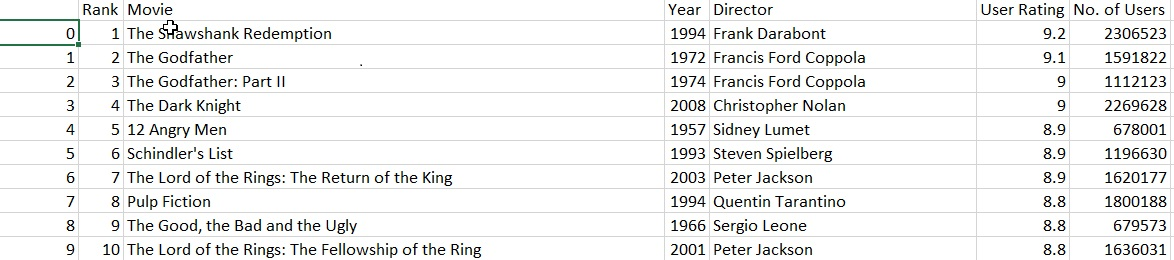

In [22]:
path2 = "top250_head.jpg"
img2 = Image(path2)
display(img2)